In [1]:
import numpy as np

In [2]:
path = "/home/andrea/Desktop/Final/Baseline5Prime/5.1/"

filesK1 = []
filesK3 = []
filesK6 = []
filesK9 = []

files = []

for rep in range(1, 4):
    for vm in range(1,4):
        for instance in range(1,3):
            filesK1.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K1_R'+str(rep)+'.log')
            filesK3.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K3_R'+str(rep)+'.log')
            filesK6.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K6_R'+str(rep)+'.log')
            filesK9.append(path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K9_R'+str(rep)+'.log')
files.append(filesK1)
files.append(filesK3)
files.append(filesK6)
files.append(filesK9)

In [26]:
results = [[0 for x in range(7)] for y in range(4)]
f = 0
for key in [1,3,6,9]:
    latency = np.zeros(3)
    throughput = np.zeros(3)
    for rep in range(1, 4):
        fileToOpen = []
        for vm in range(1,4):
            for instance in range(1,3):
                fileToOpen.append([z for z in files[f] if z == path+'VM'+str(vm)+'_'+str(instance)+'/rep'+str(rep)+'/output_C2_T1_W64_K'+str(key)+'_R'+str(rep)+'.log'])
        
        for j in range(0, len(fileToOpen)):
            fileI = open(fileToOpen[j][0], "r")
            linesI = []
            for line in fileI:
                linesI.append(line)

            xI = np.asarray(linesI)

            countI = 0
            i = 2
            while xI[i] != "ALL STATS\n":
                countI += 1
                i += 1

            i += 5
            z = xI[i][4:]
            m = 0
            numbers = 0
            singleLatency = ""
            singleThroughput = ""
            while numbers < 3:
                while z[m] == " ":
                    m += 1
                while z[m] != " ":
                    if numbers == 0:
                        singleThroughput += z[m]
                    m += 1 
                numbers += 1
            while z[m] == " ":
                    m += 1
            while z[m] != " ":
                singleLatency += z[m]
                m += 1

            latency[rep-1] += float(singleLatency)
            throughput[rep-1] += float(singleThroughput)
        latency[rep-1] = latency[rep-1]/6
    results[f][0] = key
    results[f][1] = throughput[0]
    results[f][2] = throughput[1]
    results[f][3] = throughput[2]
    results[f][4] = latency[0]
    results[f][5] = latency[1]
    results[f][6] = latency[2]
    f += 1


In [27]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline5Prime/5.1/resultsRT.txt", "w")

In [28]:
for h in range(0, 4):         
    fileOutput.write("Keys: ")
    fileOutput.write(str(int(results[h][0])))
    fileOutput.write('\nThroughput: ')
    fileOutput.write(str(results[h][1])+ " " + str(results[h][2]) + " " + str(results[h][3]))
    fileOutput.write('\nResponse Time: ')
    fileOutput.write(str(results[h][4])+ " " + str(results[h][5]) + " " + str(results[h][6]))
    fileOutput.write('\n\n')

fileOutput.close()

In [3]:
file = open("/home/andrea/Desktop/Final/Baseline5Prime/5.1/resultsRT.txt")
file2 = open("/home/andrea/Desktop/Final/Baseline5Prime/5.2/resultsRT.txt")
keys = [1,3,6,9]
responses = np.zeros(4)
responses2 = np.zeros(4)
errResponses = np.zeros(4)
errResponses2 = np.zeros(4)

throughput = np.zeros(4)
throughput2 = np.zeros(4)
errThroughput = np.zeros(4)
errThroughput2 = np.zeros(4)


index = 1

lines = []
for line in file:
    lines.append(line)
x = np.asarray(lines)

lines2 = []
for line2 in file2:
    lines2.append(line2)
x2 = np.asarray(lines2)


j = 0
while index < len(x)-1:
    values = []
    values2 = []
    values3 = []
    values4 = []
    values3.append(float(x[index].split(" ")[1]))
    values3.append(float(x[index].split(" ")[2]))
    values3.append(float(x[index].split(" ")[3][:-1]))

    values.append(float(x[index+1].split(" ")[2]))
    values.append(float(x[index+1].split(" ")[3]))
    values.append(float(x[index+1].split(" ")[4][:-1]))
    
    values4.append(float(x2[index].split(" ")[1]))
    values4.append(float(x2[index].split(" ")[2]))
    values4.append(float(x2[index].split(" ")[3][:-1]))
    
    values2.append(float(x2[index+1].split(" ")[2]))
    values2.append(float(x2[index+1].split(" ")[3]))
    values2.append(float(x2[index+1].split(" ")[4][:-1]))
    
    responses[j] = np.mean(values)
    responses2[j] = np.mean(values2)
    
    errResponses[j] = np.std(values)
    errResponses2[j] = np.std(values2)
    
    throughput[j] = np.mean(values3)
    throughput2[j] = np.mean(values4)
    
    errThroughput[j] = np.std(values3)
    errThroughput2[j] = np.std(values4)
    
    
    index += 4
    j += 1

In [4]:
import matplotlib.pyplot as plt

In [31]:
plt.figure(figsize=((27, 20)))
keys = np.asarray([1, 3, 6, 9])
width = 0.5
margin = 0.05

plt.title('Response Time for Multi Get over number of keys', fontsize= 40)
plt.xlabel("Number of Keys in a multi-get Request", fontsize= 35)
plt.yticks(fontsize=30)
plt.ylabel("Response Time [msec]", fontsize= 35)
rect = plt.bar(keys-margin, responses, width, yerr=errResponses, tick_label=keys, ecolor='blue', color='lightblue', capsize=4, label="Sharded")
rect2 = plt.bar(keys+margin+width, responses2, width, yerr=errResponses2, tick_label=keys, ecolor='red', color='lightsalmon', capsize=4, label="Non Sharded")
plt.legend(loc=2, fontsize=30)
plt.xticks(keys + width / 2, fontsize = 30)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.03*height,
                '%.2f' % float(height), ha='center', va='bottom', fontsize=21)

autolabel(rect)
autolabel(rect2)

In [32]:
plt.savefig('/home/andrea/Desktop/Final/Baseline5Prime/ResponseTime.png')

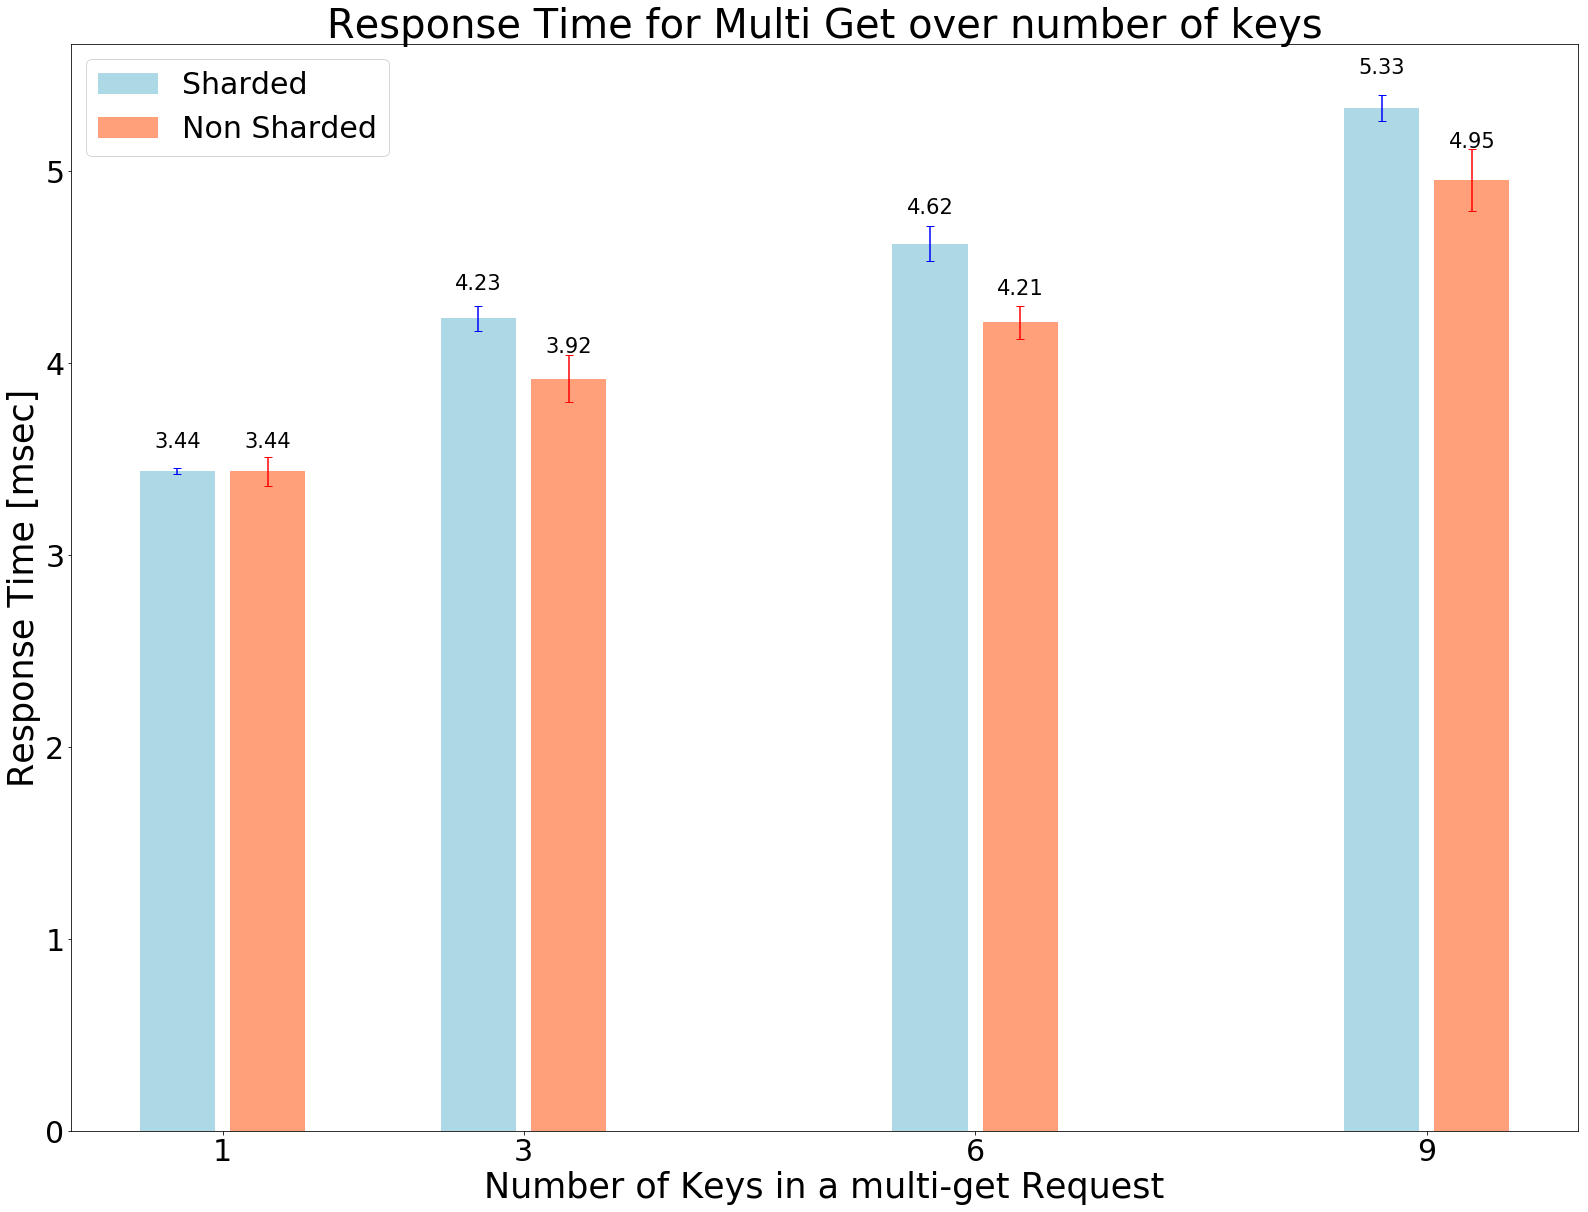

In [30]:
plt.show()